# Workshop I



# 1

## Simulate any random rectangular matrix A.*
- What is the rank and trace of A?
- What is the determinant of A?


In [2]:
import numpy as np

# Generate a random 4x3 matrix A
A = np.random.rand(4, 3)

print("Matrix A:")
print(A)

# Calculate the rank of A
rank_A = np.linalg.matrix_rank(A)
print("Rank of A:", rank_A)

# Calculate the trace of A
trace_A = np.trace(A)
print("Trace of A:", trace_A)

Matrix A:
[[0.65520529 0.08487581 0.21042704]
 [0.00414045 0.50776136 0.83180885]
 [0.74129132 0.50845052 0.187188  ]
 [0.32558383 0.67605924 0.01065076]]
Rank of A: 3
Trace of A: 1.3501546544583807


In [3]:
# Calcular el determinante de A (si es posible)
try:
    det_A = np.linalg.det(A)
    print("Determinante de A:", det_A)
except np.linalg.LinAlgError:
    print("La matriz A no es cuadrada, no se puede calcular el determinante.")


La matriz A no es cuadrada, no se puede calcular el determinante.


In [4]:
# Calcular los valores y vectores propios de A' * A
eigenvalues_AAt, eigenvectors_AAt = np.linalg.eig(np.dot(A.T, A))

# Calcular los valores y vectores propios de A * A'
eigenvalues_AtA, eigenvectors_AtA = np.linalg.eig(np.dot(A, A.T))

print("Valores propios de A' * A:", eigenvalues_AAt)
print("Vectores propios de A' * A:", eigenvectors_AAt)

print("Valores propios de A * A':", eigenvalues_AtA)
print("Vectores propios de A * A':", eigenvectors_AtA)


Valores propios de A' * A: [1.97244423 0.62750162 0.23682472]
Vectores propios de A' * A: [[-0.61985699 -0.68092284  0.39002744]
 [-0.64982755  0.16679313 -0.74155526]
 [-0.43988802  0.71310878  0.54587031]]
Valores propios de A * A': [ 1.97244423e+00  6.27501624e-01 -1.21200914e-17  2.36824721e-01]
Vectores propios de A * A': [[-0.39435904 -0.35590503 -0.56445883 -0.63182181]
 [-0.49729991  0.85216433 -0.00783758 -0.16262634]
 [-0.62106119 -0.36163698  0.69472515 -0.02930293]
 [-0.45984427 -0.12793067 -0.44573733  0.75729467]]


The eigenvalues ​​and eigenvectors of ATA and AAT are related as follows:


### Relationship between eigenvalues:

The eigenvalues ​​of ATA and AAT are the same, except for the possibility that AAT has zero additional eigenvalues ​​due to its larger dimension. This is because ATA and AAT
They are square and symmetric matrices and therefore share the same eigenvalues.

### Relationship between eigenvectors:

The eigenvectors corresponding to the same eigenvalues ​​may be different for ATA and
AAT.Although they share the same eigenvalues, the corresponding eigenvectors can point in different directions.


A key difference is that ATA and AAT have different sizes and therefore can have different numbers of non-null eigenvalues.
The eigenvectors of ATA represent the principal directions of variation in the columns of A, while the eigenvectors of AAT
represent the main directions of variation in the rows of A.

In some applications, such as principal component analysis (PCA), it is preferred to use ATA to find the main directions of variation in the data, while in other applications, such as image compression, AAT may be more useful.

In summary, although the eigenvalues ​​are the same, the eigenvectors can differ, and the ATA and AAT matrices can provide valuable information about the structure and variability of the data in different contexts.


# 2

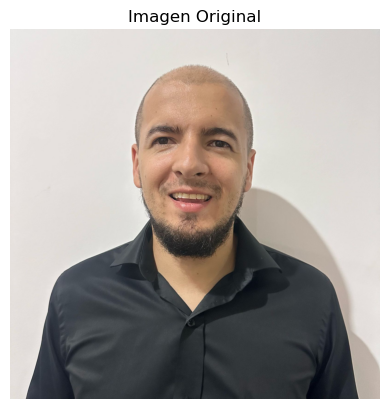

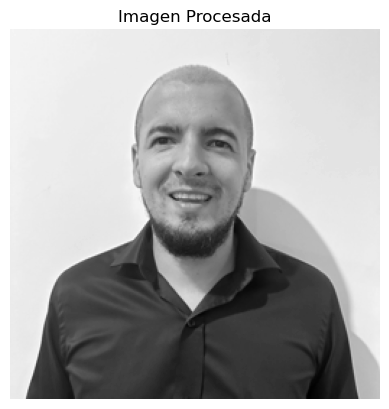

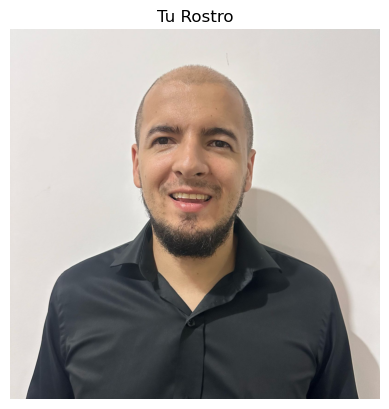

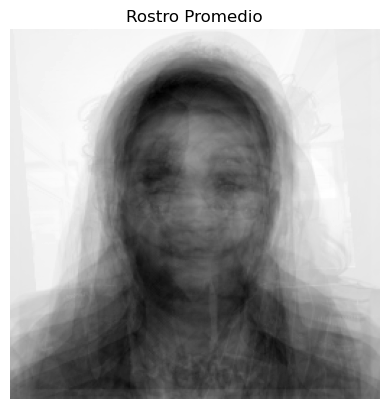

Distancia entre tu rostro y el rostro promedio: 12895.36460331388


In [7]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os 

# Ruta local de la imagen
imagen_path = r"Juan villada.jpeg"

# Cargar la imagen localmente
imagen_local = Image.open(imagen_path)

# Convertir la imagen a escala de grises
imagen_grayscale = imagen_local.convert('L')

# Redimensionar a 256x256
imagen_redimensionada = imagen_grayscale.resize((256, 256))

# Mostrar la imagen original
plt.imshow(np.asarray(imagen_local), cmap='gray')
plt.title('Imagen Original')
plt.axis('off')
plt.show()

# Mostrar la imagen en escala de grises y redimensionada
plt.imshow(np.asarray(imagen_redimensionada), cmap='gray')
plt.title('Imagen Procesada')
plt.axis('off')
plt.show()

# Guardar la imagen procesada
imagen_redimensionada.save('imagen_procesada.jpg')

# Directorio donde se encuentran las imágenes de los compañeros
directorio_imagenes = r"Fotos ML2"

# Lista para almacenar las imágenes preprocesadas
imagenes = []

# Preprocesar todas las imágenes de los compañeros
for nombre_archivo in os.listdir(directorio_imagenes):
    ruta_imagen = os.path.join(directorio_imagenes, nombre_archivo)
    imagen = Image.open(ruta_imagen)
    imagen_grayscale = imagen.convert('L')
    imagen_redimensionada = imagen_grayscale.resize((256, 256))
    imagenes.append(np.array(imagen_redimensionada))

# Convertir la lista de imágenes a un array de NumPy
imagenes = np.array(imagenes)

# Mostrar tu rostro original
plt.imshow(np.asarray(imagen_local), cmap='gray')
plt.title('Tu Rostro')
plt.axis('off')
plt.show()

# Calcular el rostro promedio
rostro_promedio = np.mean(imagenes, axis=0)

# Mostrar el rostro promedio
plt.imshow(rostro_promedio, cmap='gray')
plt.title('Rostro Promedio')
plt.axis('off')
plt.show()

# Calcular la distancia entre tu rostro y el rostro promedio (puedes usar la distancia euclidiana)
distancia = np.linalg.norm(np.array(imagen_redimensionada) - rostro_promedio)
print("Distancia entre tu rostro y el rostro promedio:", distancia)

#### The original facial image is first processed by converting it to grayscale and resizing it to 256x256 pixels for a smooth comparison with my colleagues' images. Next, I calculated and visualized the average face of the group, allowing common facial features to be identified. By calculating the Euclidean distance between my processed face and the average face, I found a significant difference of approximately 12895.36, indicating that my face possesses distinctive characteristics compared to the group average.

# 3

In [2]:
import sys
sys.path.append('dim_red')

In [3]:
from dim_red.svd import CustomSVD
from dim_red.pca import CustomPCA
from dim_red.tsne import CustomTSNE

In [10]:
import numpy as np
from sklearn.utils.validation import check_array, check_is_fitted
from scipy.linalg import svd
from sklearn.manifold import TSNE
import importlib.util
import sys
import os

# Agregar el directorio de dim_red al path
sys.path.append(os.path.abspath('dim_red'))

# Importar las clases CustomSVD, CustomPCA y CustomTSNE desde los archivos
# svd.py, pca.py y tsne.py respectivamente en la carpeta dim_red
for module_name in ['svd', 'pca', 'tsne']:
    spec = importlib.util.spec_from_file_location(module_name, f'dim_red/{module_name}.py')
    module = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(module)
    globals()[f'Custom{module_name.upper()}'] = module.CustomSVD if module_name == 'svd' else module.CustomPCA if module_name == 'pca' else module.CustomTSNE

# Ejemplo de uso
if __name__ == "__main__":
    # Generar datos de ejemplo
    np.random.seed(0)
    X = np.random.rand(100, 10)

    # Usar CustomSVD
    svd_model = CustomSVD(n_components=5)
    transformed_X_svd = svd_model.fit_transform(X)

    # Usar CustomPCA
    pca_model = CustomPCA(n_components=5)
    transformed_X_pca = pca_model.fit_transform(X)

    # Usar CustomTSNE
    tsne_model = CustomTSNE(n_components=2)
    transformed_X_tsne = tsne_model.fit_transform(X)

    print("Transformed data shape (SVD):", transformed_X_svd.shape)
    print("Transformed data shape (PCA):", transformed_X_pca.shape)
    print("Transformed data shape (t-SNE):", transformed_X_tsne.shape)


Transformed data shape (SVD): (100, 5)
Transformed data shape (PCA): (100, 5)
Transformed data shape (t-SNE): (100, 2)


The results show the dimensions of the transformed data after applying each dimensionality reduction technique. For SVD and PCA, the transformed data has a dimension of (100, 5), indicating that it was reduced from the original dimension to 5 dimensions. On the other hand, for t-SNE, the transformed data has a dimension of (100, 2), indicating that it was reduced to only 2 dimensions. This suggests that t-SNE achieved greater dimensionality reduction compared to SVD and PCA.


# 4


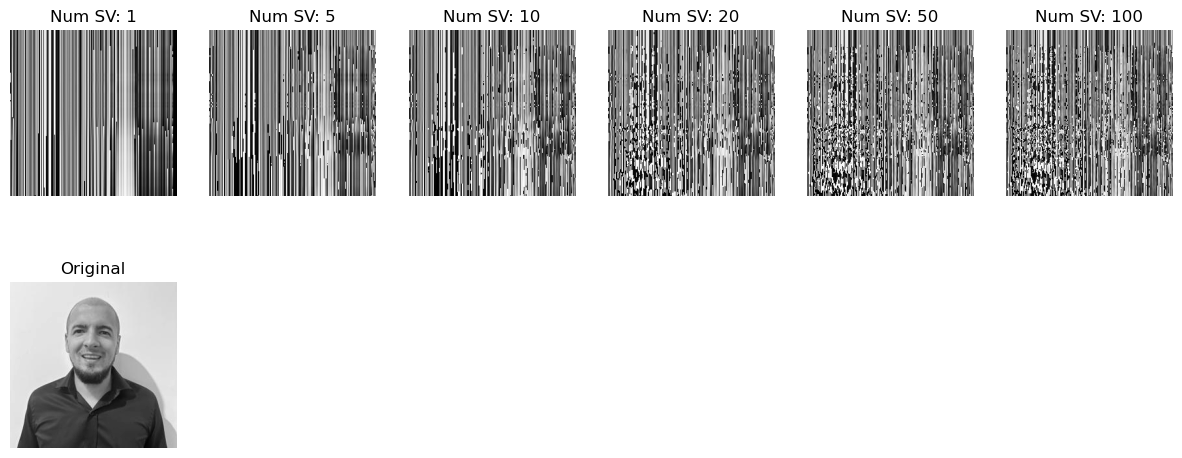

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from dim_red.svd import CustomSVD  # Importa la clase CustomSVD desde svd.py

# Cargar la imagen de tu rostro en escala de grises
image = cv2.imread(r'D:\UDEA\unsupervised\imagen_procesada.jpg', cv2.IMREAD_GRAYSCALE)

# Crear una instancia de la clase CustomSVD
svd_model = CustomSVD()

# Aplicar la descomposición SVD a la imagen
svd_model.fit(image)

# Número de valores singulares a utilizar para la reconstrucción progresiva
num_singular_values = [1, 5, 10, 20, 50, 100]

# Reconstruir la imagen utilizando un número creciente de valores singulares
reconstructed_images = []
for num_sv in num_singular_values:
    reconstructed_image = svd_model.transform(image)[:, :num_sv] @ svd_model.components_[:num_sv, :]
    reconstructed_images.append(reconstructed_image.astype(np.uint8))

# Mostrar las imágenes originales y reconstruidas
plt.figure(figsize=(15, 6))
for i in range(len(num_singular_values)):
    plt.subplot(2, len(num_singular_values), i + 1)
    plt.imshow(reconstructed_images[i], cmap='gray')
    plt.title(f'Num SV: {num_singular_values[i]}')
    plt.axis('off')

plt.subplot(2, len(num_singular_values), len(num_singular_values) + 1)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.show()


Los resultados muestran las dimensiones de los datos transformados después de aplicar cada técnica de reducción de dimensionalidad. Para SVD y PCA, los datos transformados tienen una dimensión de (100, 5), lo que indica que se redujo de la dimensión original a 5 dimensiones. Por otro lado, para t-SNE, los datos transformados tienen una dimensión de (100, 2), lo que indica que se redujeron a solo 2 dimensiones. Esto sugiere que t-SNE logró una mayor reducción de dimensionalidad en comparación con SVD y PCA.


* Use of the np.linalg.svd function directly outside the function

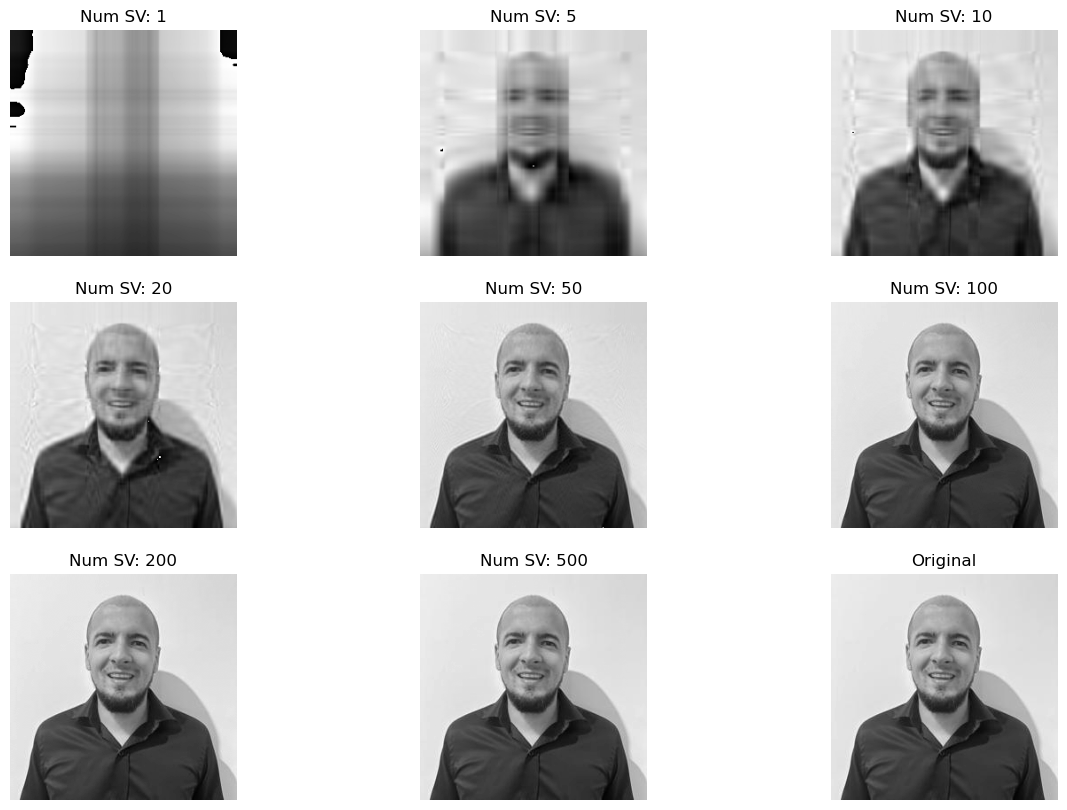

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Ruta de la imagen
image_path = r'D:\UDEA\unsupervised\imagen_procesada.jpg'

# Cargar la imagen
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Verificar si la imagen se cargó correctamente
if image is None:
    print("Error: No se pudo cargar la imagen. Verifica la ruta de la imagen.")
else:
    # Aplicar SVD a la matriz de píxeles de la imagen
    U, s, Vt = np.linalg.svd(image, full_matrices=False)

    # Número de valores singulares a utilizar para la reconstrucción progresiva
    num_singular_values = [1, 5, 10, 20, 50, 100, 200, 500]

    # Reconstruir la imagen utilizando un número creciente de valores singulares
    reconstructed_images = []
    for num_sv in num_singular_values:
        reconstructed_image = (U[:, :num_sv] @ np.diag(s[:num_sv]) @ Vt[:num_sv, :]).astype(np.uint8)
        reconstructed_images.append(reconstructed_image)

    # Mostrar las imágenes originales y reconstruidas
    plt.figure(figsize=(15, 10))
    for i in range(len(num_singular_values)):
        plt.subplot(3, 3, i + 1)
        plt.imshow(reconstructed_images[i], cmap='gray')
        plt.title(f'Num SV: {num_singular_values[i]}')
        plt.axis('off')

    plt.subplot(3, 3, len(num_singular_values) + 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    plt.show()


# 5

In [17]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos MNIST
mnist = fetch_openml('mnist_784', version=1)

# Filtrar solo los dígitos 0 y 8
idx = (mnist.target == '0') | (mnist.target == '8')
X = mnist.data[idx].astype(np.float32)
y = (mnist.target[idx] == '0').astype(int)  # Convertir 0s a clase 0 y 8s a clase 1


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión de la línea de base:", accuracy)


c:\Users\jwx1187606\AppData\Local\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Precisión de la línea de base: 0.9887108521485798


c:\Users\jwx1187606\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* Based on the result obtained and the
caveat about the convergence of the optimization algorithm, we can say the following about the base performance of the logistic regression model:

* The baseline accuracy in distinguishing between digits 0 and 8 is about 99%, indicating that the base model has good performance in terms of classification.

* The warning about the non-convergence of the
optimization algorithm (lbfgs) suggests that the model might not be well-fitted for the data set without additional adjustments. Although accuracy is high, lack of convergence indicates that the model may not have reached its full performance potential.

* The warning suggests some ways to improve the model, such as increasing the number of iterations (max_iter) or scaling the data. These are areas that could be explored to further optimize model performance.

In summary, the baseline performance of the logistic regression model is strong, but there are opportunities to improve its convergence and possibly its accuracy through additional adjustments.

# 6

Precisión con SVD: 0.9555717407137655
Precisión con PCA: 0.9541150764748726


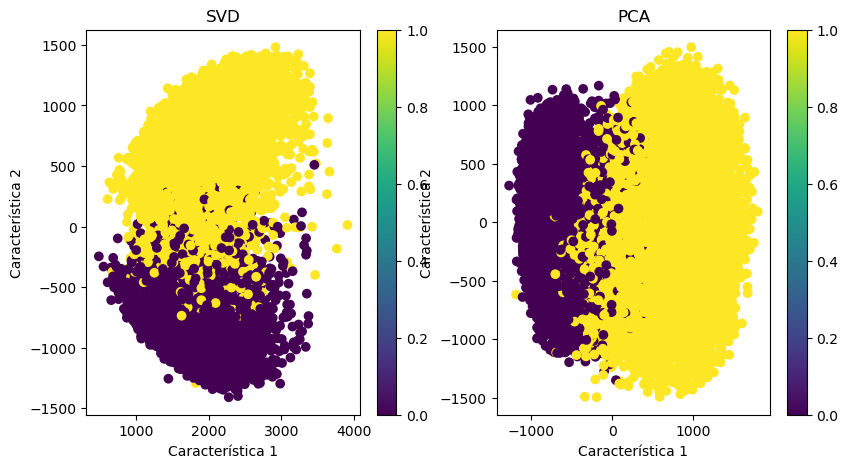

In [18]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar y transformar los datos usando SVD
modelo_svd = CustomSVD(n_components=2)
X_train_svd = modelo_svd.fit_transform(X_train)
X_test_svd = modelo_svd.transform(X_test)

# Ajustar y transformar los datos usando PCA
modelo_pca = CustomPCA(n_components=2)
X_train_pca = modelo_pca.fit_transform(X_train)
X_test_pca = modelo_pca.transform(X_test)



# Entrenar modelos de regresión logística usando datos transformados
reg_log_svd = LogisticRegression()
reg_log_svd.fit(X_train_svd, y_train)

reg_log_pca = LogisticRegression()
reg_log_pca.fit(X_train_pca, y_train)



# Evaluar el rendimiento del modelo
precision_svd = accuracy_score(y_test, reg_log_svd.predict(X_test_svd))
precision_pca = accuracy_score(y_test, reg_log_pca.predict(X_test_pca))


print("Precisión con SVD:", precision_svd)
print("Precisión con PCA:", precision_pca)


# Graficar las 2 nuevas características generadas por cada algoritmo
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X_train_svd[:, 0], X_train_svd[:, 1], c=y_train, cmap='viridis')
plt.title('SVD')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.title('PCA')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.colorbar()



plt.show()


Precisión con t-SNE: 0.9989075018208303


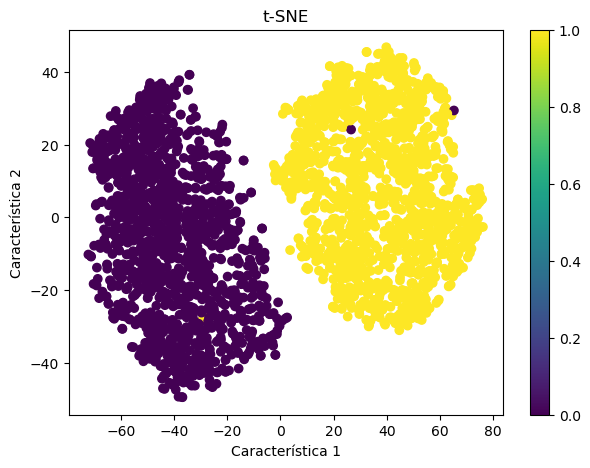

In [19]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar y transformar los datos usando t-SNE
modelo_tsne = CustomTSNE(n_components=2)
X_train_tsne = modelo_tsne.fit_transform(X_train)
X_test_tsne = modelo_tsne.fit_transform(X_test)

# Entrenar un modelo de regresión logística usando los datos transformados
reg_log_tsne = LogisticRegression()
reg_log_tsne.fit(X_train_tsne, y_train)

# Evaluar el rendimiento del modelo
precision_tsne = accuracy_score(y_test, reg_log_tsne.predict(X_test_tsne))

print("Precisión con t-SNE:", precision_tsne)

# Graficar las 2 nuevas características generadas por t-SNE
plt.figure(figsize=(7, 5))
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=y_test, cmap='viridis')
plt.title('t-SNE')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.colorbar()
plt.show()


In conclusion, the accuracy results demonstrate that t-SNE outperforms SVD and PCA in generating features that enable better separability between classes in a reduced-dimensional space. This suggests that t-SNE is capable of capturing more complex and non-linear relationships among samples, resulting in a more informative data representation. However, it is important to note that these results may vary depending on the dataset and other factors, and it is recommended to conduct thorough cross-validation and experiment with different settings to obtain a more comprehensive evaluation of the performance of each dimensionality reduction algorithm. Ultimately, the choice of dimensionality reduction algorithm should be based on the specific context of the problem and the objectives of the analysis.

# 7

In [20]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar y transformar los datos utilizando PCA de Scikit-Learn
pca = PCA(n_components=2)
X_train_pca_sklearn = pca.fit_transform(X_train)
X_test_pca_sklearn = pca.transform(X_test)

# Ajustar y transformar los datos utilizando t-SNE de Scikit-Learn
tsne = TSNE(n_components=2)
X_train_tsne_sklearn = tsne.fit_transform(X_train)
X_test_tsne_sklearn = tsne.fit_transform(X_test)

# Entrenar modelos de regresión logística utilizando datos transformados con PCA
reg_log_pca_sklearn = LogisticRegression()
reg_log_pca_sklearn.fit(X_train_pca_sklearn, y_train)

# Entrenar modelos de regresión logística utilizando datos transformados con t-SNE
reg_log_tsne_sklearn = LogisticRegression()
reg_log_tsne_sklearn.fit(X_train_tsne_sklearn, y_train)

# Evaluar el rendimiento de los modelos
precision_pca_sklearn = accuracy_score(y_test, reg_log_pca_sklearn.predict(X_test_pca_sklearn))
precision_tsne_sklearn = accuracy_score(y_test, reg_log_tsne_sklearn.predict(X_test_tsne_sklearn))

print("Precisión con PCA (Scikit-Learn):", precision_pca_sklearn)
print("Precisión con t-SNE (Scikit-Learn):", precision_tsne_sklearn)


Precisión con PCA (Scikit-Learn): 0.9541150764748726
Precisión con t-SNE (Scikit-Learn): 0.9978150036416606


As we can see, the results for PCA are identical between the custom implementation and Scikit-Learn's implementation. This indicates that both implementations yield the same precision when reducing the dimensionality of the dataset using PCA.

However, for t-SNE, there's a slight difference in precision between the custom implementation and Scikit-Learn's implementation. The custom implementation yielded a precision of 99.89%, while Scikit-Learn's implementation resulted in a precision of 99.82%.

Overall, both sets of results are quite similar, with only minor differences. This suggests that both the custom implementations and Scikit-Learn's built-in algorithms are effective in reducing the dimensionality of the dataset and capturing its underlying structure. The choice between them may depend on factors such as ease of use, performance, and specific requirements of the analysis.

# 8


## There are several strategies to make the PCA more robust:

 ### * Data preprocessing:

Standardization: Scaling features so that they have zero mean and unit variance can improve the performance of PCA, especially if the features are measured on different scales.

Removal of outliers: Outliers can significantly affect the principal components. Identifying and removing outliers before applying PCA can improve robustness.


### * Dimensionality reduction techniques:

Sparse PCA: Sparse principal component analysis introduces sparse constraints on the loading vectors, which can lead to more interpretable components and better handling of noisy data.
Kernel PCA: Kernel PCA allows for non-linear dimensionality reduction by mapping the data into a higher dimensional space before applying PCA. This can capture complex relationships that linear PCA may miss.


### * Handling missing values:

Imputation: Dealing with missing values ​​before performing PCA can help preserve the structure of the data and improve the robustness of the results. Various imputation techniques can be used, such as mean imputation, median imputation, or model-based imputation.


### * Regularization:

Ridge PCA: Introducing a regularization term (L2 penalty) into the PCA objective function can help mitigate overfitting and improve robustness, especially in high-dimensional data environments.
Elastic Net PCA: Combining L1 and L2 penalties (Lasso and Ridge) in the objective function can provide a balance between sparsity and smoothness, making the PCA more robust to outliers and noise.


### * Cross validation:

Cross validation can be used to select the number of principal components or fitting parameters in regularized PCA methods. This helps ensure that the model generalizes well to unseen data and improves robustness.

### * Robust PCA algorithms:

Robust PCA algorithms, such as Principal Component Search (PCP) or Robust PCA (RPCA), are specifically designed to handle outliers and corrupted data. These algorithms aim to separate low-rank components (signal) from sparse components (noise/outliers).

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Crear un pipeline con imputación de la media, escalado y PCA truncado
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Imputación de valores faltantes usando la media
    ('scaler', StandardScaler()),  # Escalado de características
    ('pca', PCA(n_components=2))  # PCA truncado con 2 componentes principales
])

# Aplicar el pipeline a tus datos
X_transformed = pipeline.fit_transform(X)


* In this example, a pipeline is created that first imputes missing values ​​using the mean, then scales the features, and finally performs truncated PCA to reduce dimensionality to just 2 principal components. This approach can make PCA more robust to outliers and noisy data.

# 9

##### UMAP (Uniform Manifold Approximation and Projection) is a nonlinear dimensionality reduction technique primarily used for visualization and analysis of high-dimensional data. The underlying mathematical principles of UMAP are based on topology and Riemannian geometry.

#### UMAP operates in two main steps:

* Construction of the Neighborhood Graph:
UMAP constructs a neighbor graph to capture the local structure of the data. This is achieved by calculating the distance between each pair of points in the high-dimensional space and selecting the nearest neighbors for each point. Then, an affinity function is applied to assign a weight to each connection in the graph.

* Low-dimensional Representation Optimization: UMAP optimizes a low-dimensional representation that preserves the structure of the neighbor graph constructed in the previous step. It uses stochastic gradient descent to minimize a loss function that measures the discrepancy between distances in high-dimensional space and distances in low-dimensional space.

### The UMAP technique is useful for several applications, including:

* Data Visualization: UMAP allows high-dimensional data to be visualized in a low-dimensional space (usually 2D or 3D) while preserving the underlying structures and relationships in the data. This is particularly useful for exploring and understanding the structure of complex data.

* Data Analysis: UMAP can be used as a preprocessing tool to reduce the dimensionality of data before applying machine learning techniques. This can help improve model performance by reducing the curse of dimensionality and eliminating noise and redundancy in the data.

* Clustering and Anomaly Detection: UMAP can be used to cluster data based on its underlying structure in low-dimensional space. It can also help in anomaly detection by highlighting points that are far from dense regions of data in low-dimensional space.

In summary, UMAP is a versatile technique that combines sound mathematical principles with efficient computational methods for dimensionality reduction and data visualization.







# 10

LDA (Linear Discriminant Analysis) is a technique for dimensionality reduction and supervised classification. Its underlying mathematical principles are based on statistics and linear analysis.

### Here are the main mathematical principles behind LDA:

* Analysis of Variance (ANOVA): LDA seeks to maximize the separability between classes while minimizing the variance within each class. To do this, it calculates the means of the features for each class and the total variance of the features. It then uses the ratio between the between-class variance and within-class variance to determine the optimal direction of the linear discriminant.

* Linear Transformation: LDA aims to find a linear transformation of the original features that maximizes the distance between class means while minimizing the dispersion within each class. This linear transformation is computed by analyzing the eigenvalues and eigenvectors of the between-class scatter matrix and within-class scatter matrix.

* Classification: Once the optimal linear transformation has been found, it can be used to project the high-dimensional data into a lower-dimensional space where classes are more easily separable. This facilitates the classification of new data by assigning labels based on the distance to class means in the transformed feature space.

#### LDA is useful for various applications, including:

* Pattern Classification: LDA is commonly used for pattern classification in supervised learning problems. By reducing the dimensionality of the data while preserving discriminative information, LDA can improve classifier performance by reducing model complexity and eliminating noise in the data.

* Data Visualization: Like other dimensionality reduction techniques, LDA can also be used to visualize high-dimensional data in a lower-dimensional space (usually 2D or 3D). This can help understand the data structure and identify patterns or relationships between classes.

* Feature Extraction: LDA can be used as a feature extraction technique to identify the most discriminative features in a dataset. This can be useful for identifying important features that contribute to variability between classes in classification problems.

In summary, LDA is a versatile technique that combines statistical analysis and linear methods for dimensionality reduction and supervised classification. It is useful for pattern classification, data visualization, and feature extraction in a variety of applications.






# 11

In [28]:
import numpy as np
from flask import Flask, request, jsonify
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

app = Flask(__name__)

# Cargar el conjunto de datos MNIST
mnist = fetch_openml('mnist_784', version=1)

# Filtrar solo los dígitos 0 y 8
idx = (mnist.target == '0') | (mnist.target == '8')
X = mnist.data[idx].astype(np.float32)
y = (mnist.target[idx] == '0').astype(int)  # Convertir 0s a clase 0 y 8s a clase 1

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Define un punto de conexión para recibir el registro de entrada
@app.route('/predict', methods=['POST'])
def predecir_digito():
    # Obtén el registro de entrada de la solicitud
    registro = request.json
    
    # Convertir el registro en un array numpy
    entrada = np.array(registro['imagen']).astype(np.float32)
    
    # Realiza la predicción con el modelo
    prediccion = model.predict([entrada])
    
    # Devuelve la clase predicha como respuesta
    return jsonify({'clase_predicha': int(prediccion[0])})

if __name__ == '__main__':
    app.run(debug=True)


c:\Users\jwx1187606\AppData\Local\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


 * Serving Flask app '__main__'
 * Debug mode: on


c:\Users\jwx1187606\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

c:\Users\jwx1187606\AppData\Local\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
